___

<a href='https://www.instagram.com/code.it29/'><img src='code.it29.jpeg'/></a>
___
<center><em>Content Copyright by @code.it29 (Shouhaddo Paul)</em></center>

In [1]:
import numpy as np 
import cv2
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
example_pic1 = cv2.imread('dataset/train/disgust/Training_10371709.jpg')

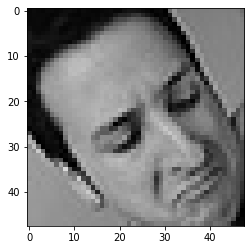

In [7]:
plt.imshow(example_pic1)

In [8]:
example_pic1.shape

(48, 48, 3)

In [9]:
train_dir ="dataset/train/"
df = {}
for expression in os.listdir(train_dir):
    directory = train_dir + expression
    df[expression] = len(os.listdir(directory))
df = pd.DataFrame(df, index=[0])
df

,angry,disgust,fear,happy,neutral,sad,surprise
0,3995,436,4097,7215,4965,4830,3171


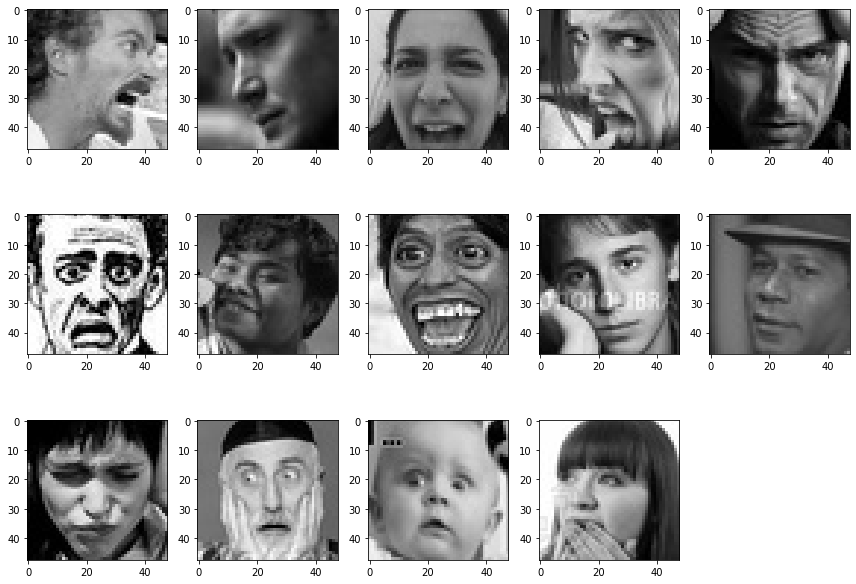

In [11]:
img_size = 48
plt.figure(0, figsize=(12,20))
index = 0
for link in os.listdir("dataset/test"):
    for i in range(1,3):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("dataset/test/" + link + "/" +os.listdir("dataset/test/" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()

In [12]:
train_datagen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1./255, 
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

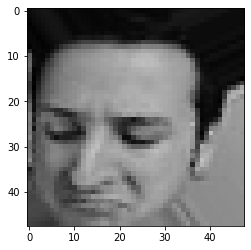

In [13]:
plt.imshow(train_datagen.random_transform(example_pic1))

In [15]:
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (48, 48),                                   
                                                 batch_size = 64,
                                                 color_mode='grayscale',
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [21]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (48, 48),                                            
                                            batch_size = 64,
                                            color_mode='grayscale',
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


In [17]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Convolution2D(filters=64,kernel_size=3 ,activation='relu', input_shape=[48, 48, 1]))
cnn.add(tf.keras.layers.Convolution2D(filters=64,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Convolution2D(filters=256,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Convolution2D(filters=256,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Convolution2D(filters=512,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Convolution2D(filters=512,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))


cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [20]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005,beta_1=0.9, beta_2=0.999,epsilon=1e-06, amsgrad=False,name="Adam"),
            loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x=training_set, validation_data = test_set, epochs = 150 ,
        shuffle=True,steps_per_epoch=training_set.n//64,validation_steps=test_set.n//64)

In [ ]:
cnn.save('fer_2013_model.h5')